<a href="https://colab.research.google.com/github/Harman061/Liquidity-Risk-Projects/blob/main/Liquidity_Risk_Stress_Testing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate Simulated Cash Flow Data
days = 30  # Stress test for 30 days
np.random.seed(42)
cash_inflows = np.random.uniform(80, 120, days)  # Simulating inflows
cash_outflows = np.random.uniform(90, 130, days)  # Simulating outflows


In [ ]:

# Step 2: Compute Net Liquidity Position
liquidity_buffer = 500  # Initial liquidity reserve
net_liquidity = liquidity_buffer + np.cumsum(cash_inflows - cash_outflows)


In [ ]:

# Step 3: Monte Carlo Simulation (1000 Scenarios)
num_simulations = 1000
simulated_liquidity = np.zeros((num_simulations, days))
for i in range(num_simulations):
    inflows = np.random.uniform(80, 120, days)
    outflows = np.random.uniform(90, 130, days)
    simulated_liquidity[i, :] = liquidity_buffer + np.cumsum(inflows - outflows)


In [ ]:

# Step 4: Risk Assessment (Probability of Liquidity Crisis)
crisis_days = (simulated_liquidity < 100).sum(axis=1)  # Count days with liquidity < 100
crisis_probability = np.mean(crisis_days > 5)  # Probability of liquidity dropping below threshold for >5 days


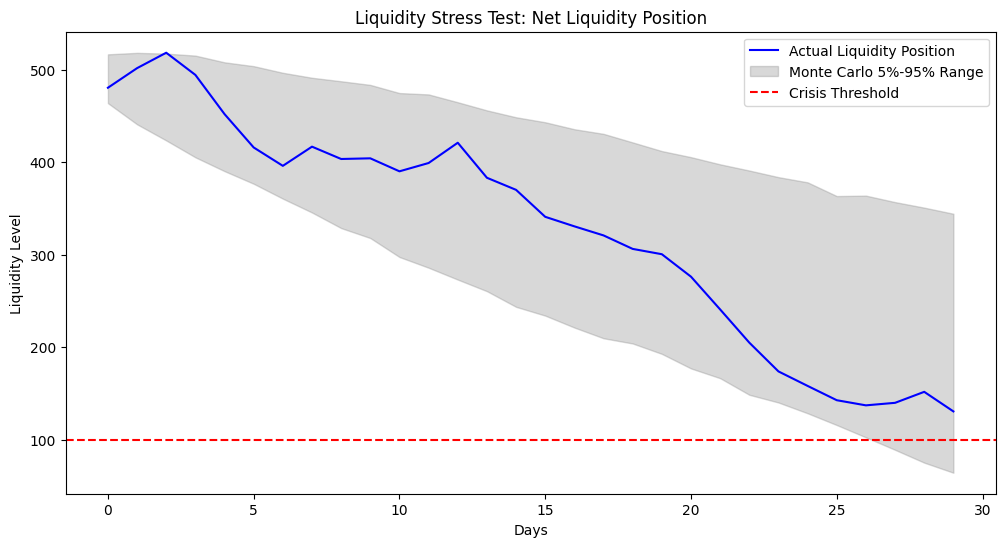

Probability of Liquidity Crisis (>5 days below threshold): 2.00%


In [ ]:

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(net_liquidity, label='Actual Liquidity Position', color='blue')
plt.fill_between(range(days),
                 np.percentile(simulated_liquidity, 5, axis=0),
                 np.percentile(simulated_liquidity, 95, axis=0),
                 color='gray', alpha=0.3, label='Monte Carlo 5%-95% Range')
plt.axhline(y=100, color='red', linestyle='--', label='Crisis Threshold')
plt.title('Liquidity Stress Test: Net Liquidity Position')
plt.xlabel('Days')
plt.ylabel('Liquidity Level')
plt.legend()
plt.show()

print(f"Probability of Liquidity Crisis (>5 days below threshold): {crisis_probability * 100:.2f}%")
